In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Pence.csv')
df

,user_country,source,content,date
0,NaN,CQ Advocacy,@whitehouse @realDonaldTrump @VP and @SecPompe...,2020-10-22T23:59:59+00:00
1,NaN,Twitter Web App,@HeARTofGod99 @nutcontroversy @gnarlyballs @to...,2020-10-22T23:59:58+00:00
2,NaN,Twitter for iPhone,@brujah1381 @naanders @Mike_Pence @senjudiciar...,2020-10-22T23:59:57+00:00
3,Texas,Twitter Web App,This is too short-sighted. I want a dual resi...,2020-10-22T23:59:55+00:00
4,"Vermont, USA",Twitter Web App,That's a gotcha question! ~ Pence All of them...,2020-10-22T23:59:54+00:00
...,...,...,...,...
1995,NaN,Twitter for iPhone,@BrentHBaker @Mike_Pence @SecretsBedard They d...,2020-10-22T22:47:42+00:00
1996,NaN,Twitter Web App,@pesachlattin Pence.,2020-10-22T22:47:41+00:00
1997,Missouri,Twitter for iPad,@Mike_Pence @realDonaldTrump LIAR! Shame on yo...,2020-10-22T22:47:40+00:00
1998,Southern California,Twitter Web App,@Mike_Pence @realDonaldTrump Um... I dunno... ...,2020-10-22T22:47:40+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

56445
['@whitehouse', '@realdonaldtrump', '@vp', 'and', '@secpompeo', '-', 'stand', 'with', 'christians', 'armenians', 'as', 'they', 'defend', 'against', 'attacks', 'by', '#azerbaijan', 'and', 'its', 'turkish']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 170.99%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

20959
['stand', 'christians', 'armenians', 'defend', 'attacks', 'turkish', 'isis', 'allies', 'answer', 'questions', 'want', 'hard', 'grounding', 'required', 'high', 'deep', 'thanks', 'origin', 'super', 'clarifying']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 824),
 ('@mike_pence', 748),
 ('@vp', 473),
 ('@presssec', 119),
 ('@govmikehuckabee', 88),
 ('@ricksantorum', 87),
 ('@bobvanderplaats', 85),
 ('@secretsbedard', 82),
 ('@steveschmidtses', 74),
 ('@whitehouse', 73),
 ('@karenpence', 64),
 ('@joebiden', 63),
 ('@potus', 60),
 ('@secpompeo', 42),
 ('@gop', 40),
 ('@teamtrump', 38),
 ('@senjudiciary', 37),
 ('@60minutes', 37),
 ('@holcombforin', 37),
 ('@flotus', 33)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,CQ Advocacy,@whitehouse @realDonaldTrump @VP and @SecPompe...,2020-10-22T23:59:59+00:00,Neutral
1,NaN,Twitter Web App,@HeARTofGod99 @nutcontroversy @gnarlyballs @to...,2020-10-22T23:59:58+00:00,Positive
2,NaN,Twitter for iPhone,@brujah1381 @naanders @Mike_Pence @senjudiciar...,2020-10-22T23:59:57+00:00,Negative
3,Texas,Twitter Web App,This is too short-sighted. I want a dual resi...,2020-10-22T23:59:55+00:00,Positive
4,"Vermont, USA",Twitter Web App,That's a gotcha question! ~ Pence All of them...,2020-10-22T23:59:54+00:00,Positive
...,...,...,...,...,...
1995,NaN,Twitter for iPhone,@BrentHBaker @Mike_Pence @SecretsBedard They d...,2020-10-22T22:47:42+00:00,Negative
1996,NaN,Twitter Web App,@pesachlattin Pence.,2020-10-22T22:47:41+00:00,Neutral
1997,Missouri,Twitter for iPad,@Mike_Pence @realDonaldTrump LIAR! Shame on yo...,2020-10-22T22:47:40+00:00,Neutral
1998,Southern California,Twitter Web App,@Mike_Pence @realDonaldTrump Um... I dunno... ...,2020-10-22T22:47:40+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    791
Neutral     727
Negative    482
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 39.55%
Percentage of neutral tweets: 36.35%
Percentage of negative tweets: 24.10%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

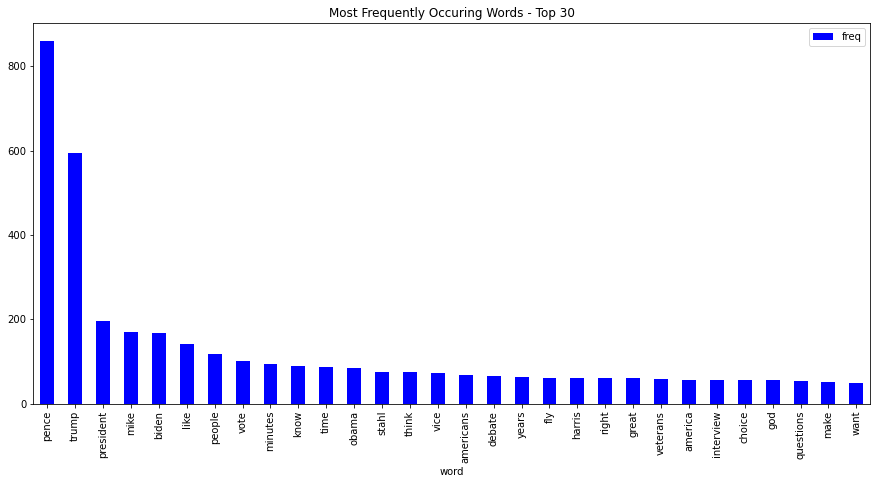

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

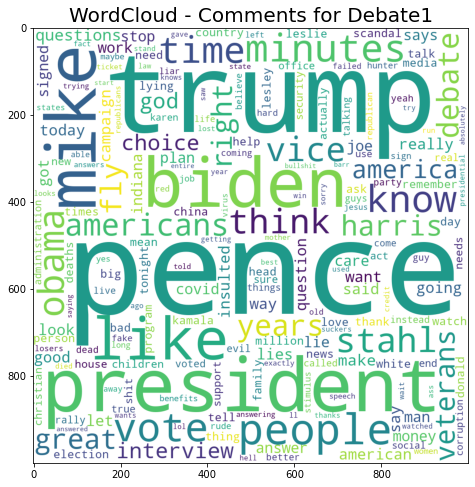

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

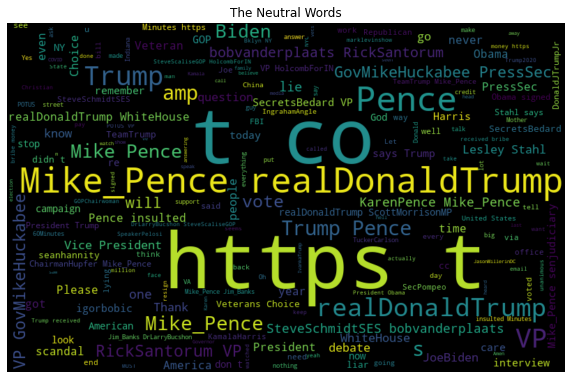

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

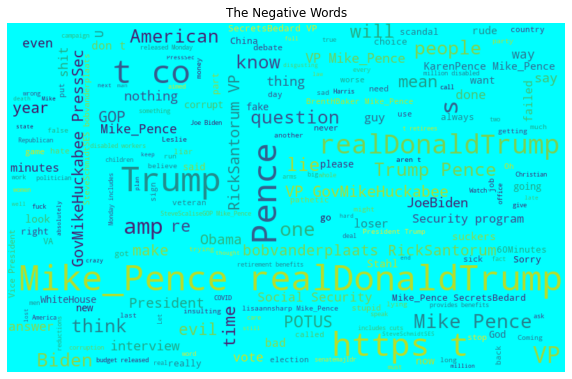

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

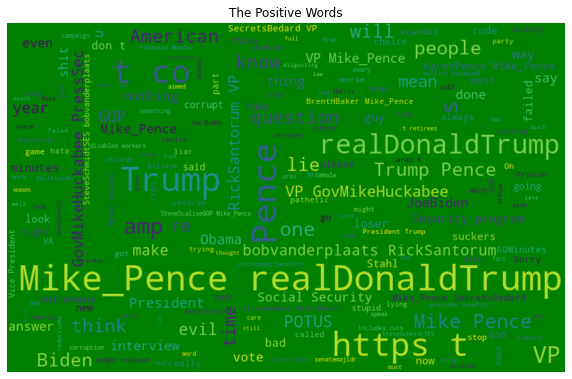

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@whitehouse @realDonaldTrump @VP and @SecPompe...,Neutral
1,@HeARTofGod99 @nutcontroversy @gnarlyballs @to...,Positive
2,@brujah1381 @naanders @Mike_Pence @senjudiciar...,Negative
3,This is too short-sighted. I want a dual resi...,Positive
4,That's a gotcha question! ~ Pence All of them...,Positive
...,...,...
1995,@BrentHBaker @Mike_Pence @SecretsBedard They d...,Negative
1996,@pesachlattin Pence.,Neutral
1997,@Mike_Pence @realDonaldTrump LIAR! Shame on yo...,Neutral
1998,@Mike_Pence @realDonaldTrump Um... I dunno... ...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,and stand with christians armenians as they de...
1,Positive,mim light dilley acc to answer your questions ...
2,Negative,pence thanks for the origin super clarifying s...
3,Positive,this is too short sighted i want a dual resign...
4,Positive,that s a gotcha question pence all of them pal...
...,...,...
1995,Negative,pence they don t have answers and their b s wo...
1996,Neutral,pence
1997,Neutral,pence liar shame on you you are not acting lik...
1998,Neutral,pence um i dunno i ll have to look it up which...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,mim light dilley acc to answer your questions ...
3,Positive,this is too short sighted i want a dual resign...
4,Positive,that s a gotcha question pence all of them pal...
7,Positive,that s a tough one clearly billy boy barr but ...
10,Positive,awesome responses from president trump he just...
...,...,...
1976,Negative,pence you are weak
1978,Negative,weird out only people he was following on twit...
1984,Negative,this round goes to pence
1993,Negative,thank you lincoln project that needed to be do...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,mim light dilley acc to answer your questions ...
3,1,this is too short sighted i want a dual resign...
4,1,that s a gotcha question pence all of them pal...
7,1,that s a tough one clearly billy boy barr but ...
10,1,awesome responses from president trump he just...
...,...,...
1976,0,pence you are weak
1978,0,weird out only people he was following on twit...
1984,0,this round goes to pence
1993,0,thank you lincoln project that needed to be do...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(954, 2)
(319, 2)


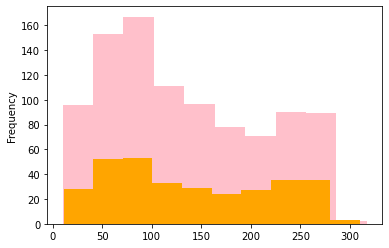

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(313607, 479240)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('trumpisnotamerica', 0.7669550776481628),
 ('implementing', 0.7630705833435059),
 ('negative', 0.7607769966125488),
 ('vs', 0.7577823996543884),
 ('ms', 0.7524409294128418),
 ('made', 0.7463285326957703),
 ('rallying', 0.7424900531768799),
 ('government', 0.7412892580032349),
 ('pres', 0.7376723289489746),
 ('asks', 0.7367458939552307)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('our', -0.40046238899230957),
 ('americans', -0.4098302125930786),
 ('us', -0.4422665238380432),
 ('million', -0.4463886022567749),
 ('military', -0.45591819286346436),
 ('vote', -0.4567742943763733),
 ('own', -0.4570923447608948),
 ('acc', -0.4581121802330017),
 ('red', -0.45952659845352173),
 ('evil', -0.46287915110588074)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(954, 500)
(954,)
(319, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5517241379310345
F1 score : 0.6587112171837709
[[ 38  81]
 [ 62 138]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9958071278825996
Validation Accuracy : 0.6050156739811913
f1 score : 0.7418032786885247
[[ 12 107]
 [ 19 181]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5987460815047022
f1 score : 0.7229437229437229
[[ 24  95]
 [ 33 167]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9486373165618449
Validation Accuracy : 0.5987460815047022
f1 score : 0.746031746031746
[[  3 116]
 [ 12 188]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 nobody does it better 

First sample after preprocessing: 
 [497 136  14 198   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6721 - accuracy: 0.6014 - val_loss: 0.6615 - val_accuracy: 0.6146
Epoch 2/20
7/7 - 1s - loss: 0.6618 - accuracy: 0.6200 - val_loss: 0.6592 - val_accuracy: 0.6146
Epoch 3/20
7/7 - 1s - loss: 0.6573 - accuracy: 0.6200 - val_loss: 0.6566 - val_accuracy: 0.6146
Epoch 4/20
7/7 - 1s - loss: 0.6485 - accuracy: 0.6200 - val_loss: 0.6493 - val_accuracy: 0.6146
Epoch 5/20
7/7 - 1s - loss: 0.6328 - accuracy: 0.6200 - val_loss: 0.6400 - val_accuracy: 0.6146
Epoch 6/20
7/7 - 1s - loss: 0.6098 - accuracy: 0.6200 - val_loss: 0.6264 - val_accuracy: 0.6146
Epoch 7/20
7/7 - 1s - loss: 0.5715 - accuracy: 0.6550 - val_loss: 0.6111 - val_accuracy: 0.6562
Epoch 8/20
7/7 - 1s - loss: 0.5069 - accuracy: 0.7587 - val_loss: 0.6113 - val_accuracy: 0.6667
Epoch 9/20
7/7 - 1s - loss: 0.4466 - accuracy: 0.8322 - val_loss: 0.6087 - val_accuracy: 0.6875
Epoch 10/20
7/7 - 1s - loss: 0.3801 - accuracy: 0.8776 - val_loss: 0.6197 - val_accuracy: 0.6771
Epoch 11/20
7/7 - 1s - loss: 0.3019 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,and stand with christians armenians as they de...
1,1,mim light dilley acc to answer your questions ...
2,0,pence thanks for the origin super clarifying s...
3,1,this is too short sighted i want a dual resign...
4,1,that s a gotcha question pence all of them pal...
...,...,...
1995,0,pence they don t have answers and their b s wo...
1996,-1,pence
1997,-1,pence liar shame on you you are not acting lik...
1998,-1,pence um i dunno i ll have to look it up which...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Validation Accuracy : 0.452
F1 score : [0.50455927 0.20304569 0.51898734]
[[ 83  20  78]
 [ 26  20  81]
 [ 39  30 123]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8973333333333333
Validation Accuracy : 0.46
f1 score : [0.49201278 0.17112299 0.548     ]
[[ 77  23  81]
 [ 21  16  90]
 [ 34  21 137]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Validation Accuracy : 0.404
f1 score : [0.46511628 0.2745098  0.43391521]
[[80 42 59]
 [29 35 63]
 [54 51 87]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.86
Validation Accuracy : 0.48
f1 score : [0.5535248  0.         0.55030801]
[[106   2  73]
 [ 39   0  88]
 [ 57   1 134]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['pence truth', 'you got this trump pence', 'pence you just won my twitter feed for tonight', 'pence liar the veterens choice act was signed into legislation by our president in hoosiers have hated you since day one we know you wouldn t have been re elected governor had you not hitched yourself to the most corrupt president ever what s that make you', 'free speech is part of the first amendment amy coney barrett was not able to name the parts of the amendment also did not know why they are tied together in one amendment great pick and special shout out to your never ending support of stupidity pence', 'so true i turn off every time that smarmy hypocrite santorum lies his way through a segment the rest are so insanely over the top except pence santorum their phony pained smirks make me sick the weak limp arguments are insulting americans see right through both', 'pence liar not even wasting my time explaining for the millionth time why this is false'

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4941 - accuracy: 0.2422 - val_loss: 0.2538 - val_accuracy: 0.2400
Epoch 2/20
11/11 - 2s - loss: 0.1827 - accuracy: 0.2363 - val_loss: 0.0234 - val_accuracy: 0.2400
Epoch 3/20
11/11 - 2s - loss: 0.1988 - accuracy: 0.2363 - val_loss: 0.0187 - val_accuracy: 0.2400
Epoch 4/20
11/11 - 2s - loss: 0.1692 - accuracy: 0.2363 - val_loss: 0.0818 - val_accuracy: 0.2400
Epoch 5/20
11/11 - 2s - loss: 0.1338 - accuracy: 0.2363 - val_loss: 0.0503 - val_accuracy: 0.2400
Epoch 6/20
11/11 - 2s - loss: 0.0481 - accuracy: 0.2363 - val_loss: -8.5643e-02 - val_accuracy: 0.2400
Epoch 7/20
11/11 - 2s - loss: -1.6796e-01 - accuracy: 0.2363 - val_loss: -3.6627e-01 - val_accuracy: 0.2400
Epoch 8/20
11/11 - 2s - loss: -8.0430e-01 - accuracy: 0.2415 - val_loss: -1.0632e+00 - val_accuracy: 0.2667
Epoch 9/20
11/11 - 2s - loss: -2.4319e+00 - accuracy: 0.2689 - val_loss: -3.0579e+00 - val_accuracy: 0.2800
Epoch 10/20
11/11 - 2s - loss: -6.2289e+00 - accuracy: 0.3037 - val_loss: -7.3069e+